In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Simple Polynomial regression

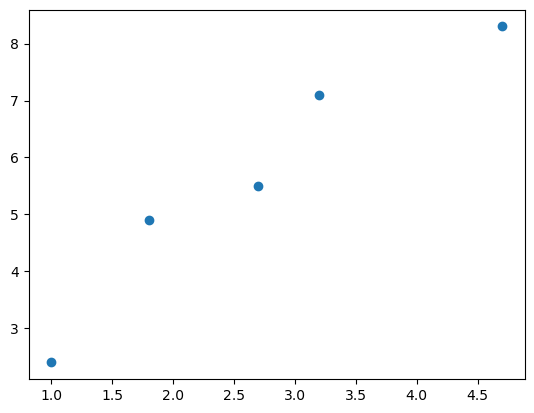

In [2]:
df = np.array([
    [1, 2.4],
    [1.8, 4.9],
    [2.7, 5.5],
    [3.2, 7.1],
    [4.7, 8.3],
], dtype='float32')

x = df[:, 0]
y = df[:, 1]
 
plt.scatter(x, y)

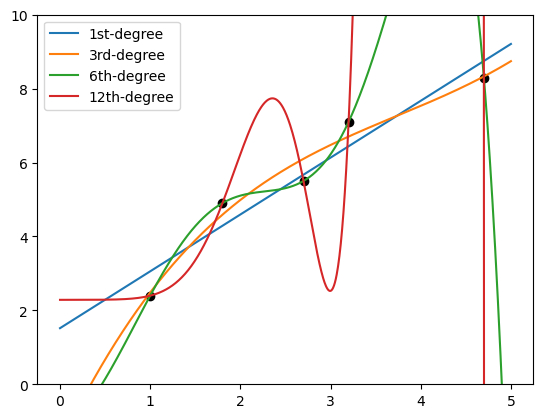

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly3 = PolynomialFeatures(degree=3, include_bias=False)
poly6 = PolynomialFeatures(degree=6, include_bias=False)
poly12 = PolynomialFeatures(degree=12, include_bias=False)

poly3_x = poly3.fit_transform(x.reshape(-1, 1))
poly6_x = poly6.fit_transform(x.reshape(-1, 1))
poly12_x = poly12.fit_transform(x.reshape(-1, 1))

lin_reg = LinearRegression().fit(x.reshape(-1, 1), y)
poly3_reg = LinearRegression().fit(poly3_x, y)
poly6_reg = LinearRegression().fit(poly6_x, y)
poly12_reg = LinearRegression().fit(poly12_x, y)

plt.scatter(x, y, c='black')

X = np.linspace(0, 5, 1000)
plt.plot(X.reshape(-1, 1), lin_reg.predict(X.reshape(-1, 1)), label="1st-degree")

plt.plot(X.reshape(-1, 1), poly3_reg.predict(poly3.fit_transform(X.reshape(-1, 1))), label="3rd-degree")

plt.plot(X.reshape(-1, 1), poly6_reg.predict(poly6.fit_transform(X.reshape(-1, 1))), label="6th-degree")

plt.plot(X.reshape(-1, 1), poly12_reg.predict(poly12.fit_transform(X.reshape(-1, 1))), label="12th-degree")

plt.ylim([0, 10])
plt.legend()

## Evaluate polynomial models

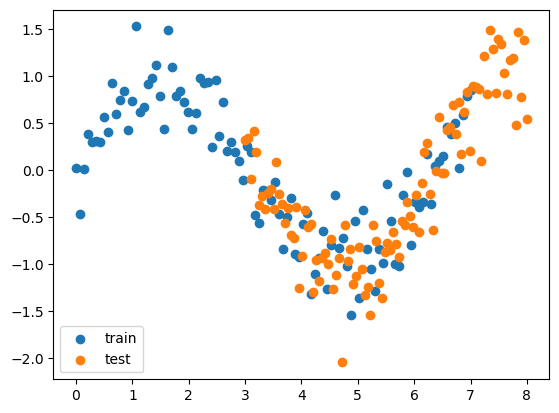

In [15]:
N = 100
X = np.linspace(0, 7, N)
Y = np.sin(X) + np.random.normal(0.0, .3, size=N)

X_test = np.linspace(3, 8, N)
Y_test = np.sin(X_test) + np.random.normal(0.0, .3, size=N)

plt.scatter(X, Y, label="train")
plt.scatter(X_test, Y_test, label="test")
plt.legend()

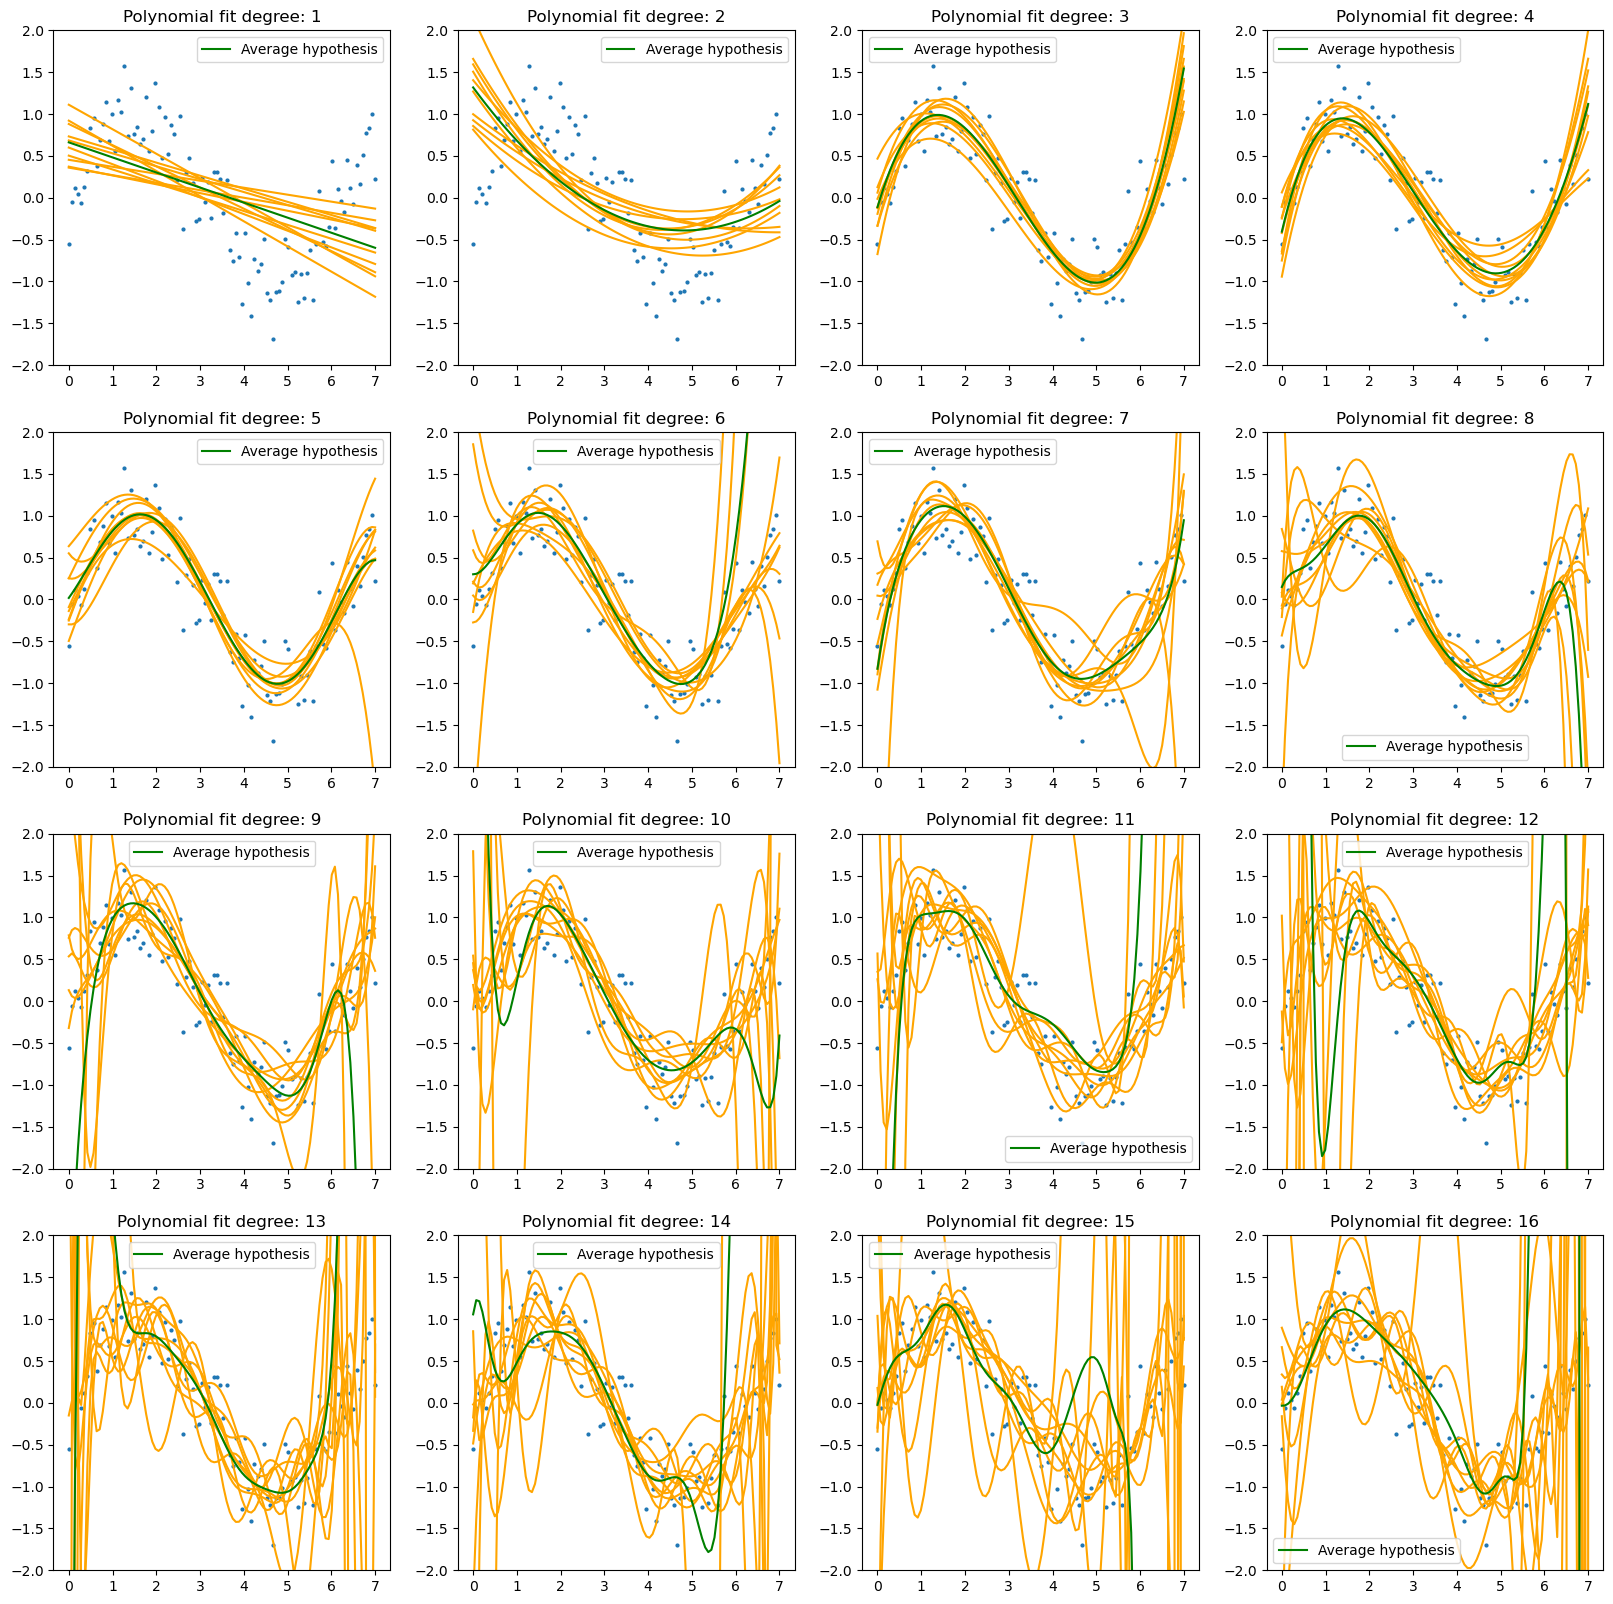

In [203]:

sample_size = 20
num_models = 10

dimx, dimy = 4, 4

fig, axes = plt.subplots(dimx, dimy, figsize=(5*dimy, 5*dimx))
axes = axes.flatten()

num_order = len(axes)

biases = []
variances = []
errors = []

for j in range(num_order):
    degree = j+1
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    axes[j].set_ylim((-2, 2))
    axes[j].set_title(f"Polynomial fit degree: {degree}")

    model_y = []
    error = 0.0

    for i in range(num_models):

        x = np.random.choice(X, size=sample_size, replace=False)
        y = np.sin(x) + np.random.normal(0.0, .3, size=sample_size)
        
        poly_x = poly.fit_transform(x.reshape(-1, 1))

        # train polynomial function
        poly_reg = LinearRegression().fit(poly_x, y)
        
        # plot new function
        pred_y = poly_reg.predict(poly.fit_transform(X.reshape(-1, 1)))
        axes[j].plot(X, pred_y, c='orange')
        model_y.append(pred_y)
        error += np.sum((Y_test - poly_reg.predict(poly.fit_transform(X_test.reshape(-1, 1))))**2)/N
    
    axes[j].scatter(X, Y, s=4)
    error /= num_models
    model_y = np.array(model_y)
    average_y = model_y.sum(axis=0) / num_models

    bias = np.sum((average_y - Y)**2)/N
    variance = np.sum((model_y - average_y)**2, axis=(0, 1))/(N*num_models)
    
    biases.append(bias**.5)
    variances.append(variance)
    errors.append(error**.5)

    axes[j].plot(X, average_y, c='green', label="Average hypothesis")
    axes[j].legend()


plt.savefig("../demo_figures/avg_hypothesis.png")

In [201]:
errors

[1.0953308728006521,
 0.7756205230564639,
 1.1472604667370696,
 1.087993644100595,
 0.9629544148430786,
 3.5669567038970156,
 11.264703003291995,
 27.019690778273894,
 278.47217038787795,
 491.024869145889,
 647.7713213041953,
 1873.6931107113799,
 296503.23906898865,
 253512.77945366598,
 5754.33509207791,
 1234278.5212861723]

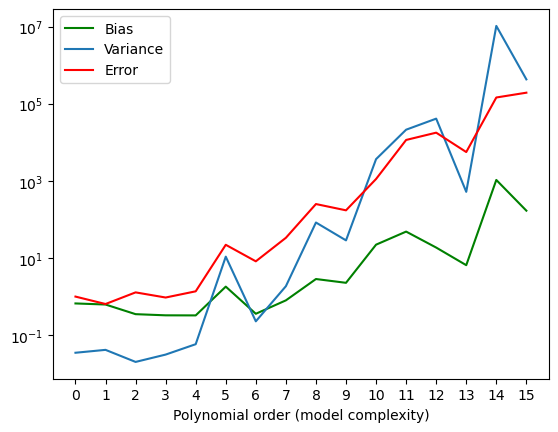

In [204]:
from matplotlib.ticker import MaxNLocator

# fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharey=True)

poly_order = [str(i) for i in range(num_order)]
# axes[0].set_ylim((0, 5))
# plt.axes().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.yscale('log')
plt.plot(poly_order, biases, label="Bias", c='g')
plt.plot(poly_order, variances, label="Variance")
plt.plot(poly_order, errors, label="Error", c='r')
plt.xlabel("Polynomial order (model complexity)")
plt.legend()

plt.savefig("../demo_figures/bias_variance.png")
